In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(x,columns = ['sepal_length(cm)',
                              'sepal_width(cm)',
                              'petal_length(cm)',
                              'petal_width(cm)'])

In [6]:
df['species_id'] = y

In [9]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [11]:
df['species_name'] = df['species_id'].map(species_map)

In [14]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
perm = np.random.permutation(len(x))

In [16]:
df = df.loc[perm]

In [18]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id,species_name
28,5.2,3.4,1.4,0.2,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
37,4.9,3.6,1.4,0.1,0,setosa
17,5.1,3.5,1.4,0.3,0,setosa


In [19]:
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


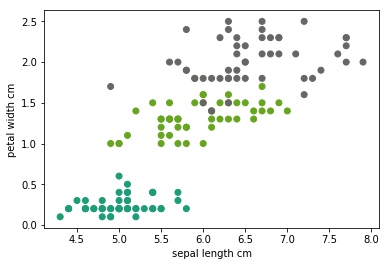

In [20]:
plt.scatter(x[:,0],x[:,3], c=y, cmap = 'Dark2' )
plt.xlabel('sepal length cm')
plt.ylabel('petal width cm')
plt.show()

In [21]:
x = np.c_[x[:,0],x[:,3]]

In [23]:
y=[]

for i in range(len(x)):
    if i < 50:
        y.append(1)
    else:
        y.append(0)

In [24]:
y = np.array(y)

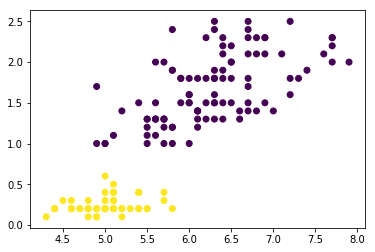

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

In [29]:
x_train, x_test = x[perm][20:],x[perm][:20]
y_train, y_test = y[perm][20:],y[perm][:20]

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((130, 2), (130,), (20, 2), (20,))

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression()

In [47]:
log_reg.fit(x_train,y_train)

C:\Users\giridhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
w,b = log_reg.coef_,log_reg.intercept_
w,b

(array([[ 0.44437065, -4.60506641]]), array([0.96483113]))

In [48]:
prob = log_reg.predict_proba(x_train)

In [49]:
prob

array([[9.59848714e-01, 4.01512864e-02],
       [9.94150115e-01, 5.84988516e-03],
       [1.27263298e-01, 8.72736702e-01],
       [9.03216171e-01, 9.67838290e-02],
       [9.89089179e-01, 1.09108214e-02],
       [8.99750614e-01, 1.00249386e-01],
       [9.99370521e-01, 6.29479057e-04],
       [9.77324478e-01, 2.26755225e-02],
       [8.58169839e-01, 1.41830161e-01],
       [9.98566820e-01, 1.43318046e-03],
       [8.80514799e-01, 1.19485201e-01],
       [9.18982992e-01, 8.10170075e-02],
       [8.66965502e-02, 9.13303450e-01],
       [7.23058826e-02, 9.27694117e-01],
       [8.76347654e-01, 1.23652346e-01],
       [1.14817323e-01, 8.85182677e-01],
       [8.63092103e-01, 1.36907897e-01],
       [1.31661149e-01, 8.68338851e-01],
       [1.10910240e-01, 8.89089760e-01],
       [9.97617168e-01, 2.38283156e-03],
       [9.99264252e-01, 7.35747845e-04],
       [9.96048699e-01, 3.95130148e-03],
       [9.89940346e-01, 1.00596539e-02],
       [1.18843645e-01, 8.81156355e-01],
       [1.109102

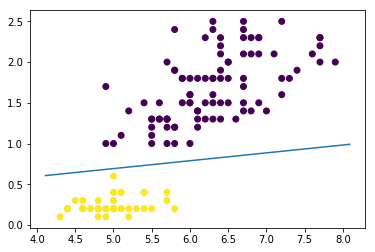

In [46]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals*w[0][0]+b)/w[0][1]
plt.plot(xvals,yvals)
plt.show()

In [42]:
predictions = log_reg.predict(x_test)

In [43]:
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [44]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

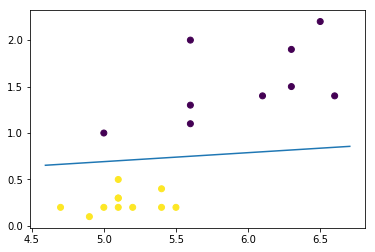

In [45]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals*w[0][0]+b)/w[0][1]
plt.plot(xvals,yvals)
plt.show()